In [2]:
import random,timeit

## qs
def quick_sort(A,first,last):
    if first >= last : return A[last]
    global Qc, Qs
    left,right = first+1 , last
    p = A[first]
    while left <= right:
        while left <= last and A[left] <p :
            left+=1
            Qc += 1
        while right > first and A[right] > p :
            right -= 1
            Qc += 1
        if left <= right  : # Swap  A[left ] and A[right]
            A[left]  , A[right] = A[right]  , A[left]
            left += 1
            right -=1
            Qs += 1

        # palce pivaot at the right place
    A[first] , A[right] = A[right], A[first]
    Qs+=1
    quick_sort(A,first,right-1)
    quick_sort(A,left,last)
    #quick_sort(A,right+1, last)    # same index number which is havit


#insertion_sort
def insertion_sort(A,n):
    for i in range(1,n) :
        j =i-1
        while j >= 0 and A[j] > A[j+1] :
            A[j], A[j+1] =A[j+1] ,A[j]
            j = j-1
    return A
#quick sort with undercondition of insertion function
def i_quick_sort(A,first,last,k):
    if first >= last :
        return A[last]

    if last - first <= k:
        A[first:last + 1] = insertion_sort(A[first:last + 1], len(A[first:last + 1]))
    else:
        left,right = first+1 , last
        p = A[first]
        while left <= right:
            while left <= last and A[left] <p :
                left+=1
            while right > first and A[right] > p :
                right -= 1
            if left <= right  : # Swap  A[left ] and A[right]
                A[left]  , A[right] = A[right]  , A[left]
                left += 1
                right -=1
            # palce pivaot at the right place
        A[first] , A[right] = A[right], A[first]
        i_quick_sort(A,first,right-1,k)
        i_quick_sort(A,left,last,k)


## ms
def merge_sort(A,first,last):
    if first >= last : return
    merge_sort(A,first,(first+last)//2)
    merge_sort(A,((first+last)//2)+1,last)
    merge_two_sorted_lists(A,first,last)

def merge_two_sorted_lists(A,first,last):
    global Mc,Ms
    m = (first+ last) // 2
    i,j = first , m+1
    B = []
    while i <= m and j<=last :
        if A[i] <= A[j]:
            B.append(A[i])
            i+=1
        else :
            B.append(A[j])
            j+=1
        Mc += 1 #  비교


    for  k in range(i,m+1):
        B.append(A[k])
    for  k in range(j,last+1):
        B.append(A[k])
    for i in range(first,last+1):
        A[i] = B[i-first]

    Ms += ( (last+1) - first)*2   # 이동 a -> b -> a

#merge sort with undercondition of insertion function
def i_merge_sort(A,first,last,k):
    if first >= last : return
    # unde condtion k<40
    if last - first <= k:
        A[first:last+1] = insertion_sort(A[first:last+1],len(A[first:last+1]))
    else:
    # 분할
        i_merge_sort(A,first,(first+last)//2,k)
        i_merge_sort(A,((first+last)//2)+1,last,k)

        # 병
        i_merge_two_sorted_lists(A,first,last)

def i_merge_two_sorted_lists(A,first,last):
    m = (first+ last) // 2
    i,j = first , m+1
    B = []
    while i <= m and j<=last :
        if A[i] <= A[j]:
            B.append(A[i])
            i+=1
        else :
            B.append(A[j])
            j+=1
    for  k in range(i,m+1):
        B.append(A[k])
    for  k in range(j,last+1):
        B.append(A[k])
    for i in range(first,last+1):
        A[i] = B[i-first]

## hs
def heap_sort(C):
    global Hs, Hc
    n = len(C)

    for k in range(n // 2, -1, -1):
        heapify_down(C, k, n)
    for k in range(len(C)-1,-1,-1):
        C[0] , C[k] = C[k] ,C[0]
        Hs += 1
        n = n-1
        heapify_down(C,0,n)

def heapify_down(C, k, n):
    global Hs, Hc
    while 2 * k + 1 < n:
        L, R = 2 * k + 1, 2 * k + 2
        Hc +=2 # move
        if L < n and C[L] > C[k]:
            m = L
        else:
            m = k

        if R < n and C[R] > C[m]:
            m = R

        if m != k:
            C[k], C[m] = C[m], C[k]
            Hs+= 2 # swap
            k = m

        else:
            break


#### 하단부 코드 동일

def check_sorted(A):
    for i in range(n-1):
        if A[i] > A[i+1]:return False
    return True



#Global 변수로 선언
#Qc : 리스트의 두수를 비교한 횟수 저장
#Qs: 두수를 교환한 횟수 저장
#mc,msn는 merge sort 에서 비교, 교환(또는 이동 ) 횟수 저장

# this kind of valriable will be using for global variable
# Hc, Hs는 heap sort에서 비교, 교환(또는 이동) 횟수 저장
Qc,Qs = 0,0
Mc,Ms = 0,0
Hc,Hs = 0,0

n = 10
#n = int(input())
random.seed()
A = []
for i in range(n) :
    A.append(random.randint(-1000,1000))
B = A[:]
C = A[:]


print("")
print("Quick sort:")
print("time =",timeit.timeit("quick_sort(A,0,n-1)",globals=globals(),number=1))
print("  comparisoon = {:10d},swaps= {:10d}\n".format(Qc,Qs))


print("Merge sort:")
print("time =",timeit.timeit("merge_sort(B,0,n-1)",globals=globals(),number=1))
print("  comparisoon = {:10d},swaps= {:10d}\n".format(Mc,Ms))


print("Heap sort:")
print("time =",timeit.timeit("heap_sort(C)",globals=globals(),number=1))
print("  comparisoon = {:10d},swaps= {:10d}\n".format(Hc,Hs))


#  진짜 정렬되었는지 check 한다. 정렬이 되지 않았더며 fail
# check  sorted if there an error ?
assert(check_sorted(A))
assert(check_sorted(B))
assert(check_sorted(C))


Quick sort:
time = 1.5424999999957834e-05
  comparisoon =         26,swaps=          9

Merge sort:
time = 3.393699999953981e-05
  comparisoon =         21,swaps=         68

Heap sort:
time = 2.3161999999743443e-05
  comparisoon =         40,swaps=         40



In [3]:
from matplotlib import pyplot as plt

In [4]:
# minmun time of mean k in insertion_sort at each size of n
n = [100,500,1000,2000,3000,5000,100000,500000]
finalk = [0,0,0,0,0,0,0,0]
for _ in range(1):
    i_qtime = []
    for x in range(len(n)) :
        timetmp = []
        A = []
        for i in range(n[x]) :
            A.append(random.randint(-1000,1000))
        # 같은  A 에서 계산 특정 n  고정후 k 10~ 40  까지 계산
        for k in range(10,40+1):
            B =A[:] 
            iq_tmptime =timeit.timeit("i_quick_sort(B,0,n[x]-1,k)",globals=globals(),number=1)
            timetmp.append(iq_tmptime)
        ti=timetmp.index(min(timetmp))
        i_qtime.append(ti+10)
    timelist=i_qtime
    if finalk[0]== 0:
        finalk = timelist
    else:
        for x in range(len(finalk)):
            finalk[x] = round((finalk[x]+timelist[x])*(0.5),5)
print(finalk)

[12, 11, 38, 10, 12, 12, 18, 39]


0.6820838708306602


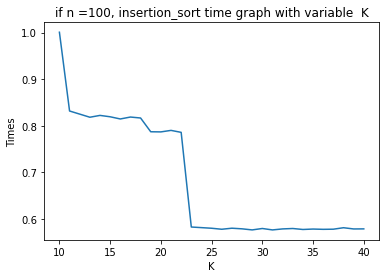

In [141]:
# under size of n =100 graph of insertion sort time from  k (10,40)

from matplotlib import pyplot as plt
import numpy as np
n = 100
tmp_times = []
random.seed()
B= [random.randint(-1000, 1000) for i in range(n)]
for k in range(10,41):
    a = B[:]
    time1 = 10000*timeit.timeit("i_quick_sort(A, 0, n-1, k)", globals=globals(), number=1)
    tmp_times.append(time1)
print(np.mean(tmp_times))

plt.plot(list(range(10,41)) , tmp_times)
plt.xlabel("K")
plt.ylabel("Times")
plt.title("if n =100, insertion_sort time graph with variable  K")
plt.show()

In [134]:
# 비교 insertion quick sort and quick sort
n = [100,500,1000,2000,3000,5000,100000,500000]
k= [40, 40, 38, 10, 12, 12, 18, 40]

qtime = []
i_qtime = []
for x in range(len(n)) :
    A = []
    for i in range(n[x]) :
        A.append(random.randint(-1000,1000))
    B =A[:] 
    q_tmptime =timeit.timeit("quick_sort(A,0,n[x]-1)",globals=globals(),number=1)
    iq_tmptime =timeit.timeit("i_quick_sort(B,0,n[x]-1,k[x])",globals=globals(),number=1)
    
    
    qtime.append(round(q_tmptime,5))
    i_qtime.append(round(iq_tmptime,5))

# 단위 변환   1ms =. 0.001s
for x in range(len(n)) :
    qtime[x]=qtime[x] *1000
    i_qtime[x]=i_qtime[x] *1000  

print(qtime)
print(i_qtime)

[0.19, 1.17, 2.77, 5.92, 9.03, 13.19, 304.70000000000005, 1803.45]
[0.23, 1.3699999999999999, 2.8, 4.24, 6.42, 11.08, 259.99, 1272.71]


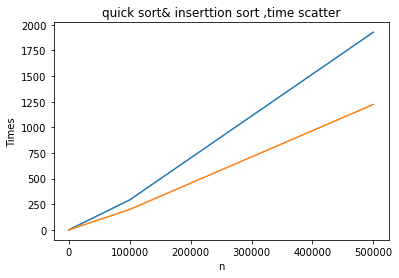

In [133]:
"""
n = [100,500,1000,5000]
k = [10, 10, 10, 10,]
qtime = [0.17, 0.97, 2.07, 13.33]
i_qtime = [0.26, 1.34, 2.83, 14.31]
"""
for x in range(len(qtime)):
    mtime[x]=round(qtime[x] ,1)
    i_mtime[x]=round(i_qtime[x] ,1)


plt.plot(n ,qtime)
plt.plot(n ,i_qtime)
plt.xlabel("n")
plt.ylabel("Times")
plt.title("quick sort& inserttion sort ,time scatter")
plt.show()

In [31]:
# minmun time of mean k in merge_sort at each size of n
n = [100,500,1000,2000,3000,5000,100000,500000]
finalk = [0,0,0,0,0,0,0,0]
for _ in range(3):  # 10~ 100 정도 대입
    i_mtime = []
    for x in range(len(n)) :
        timetmp = []
        A = []
        for i in range(n[x]) :
            A.append(random.randint(-1000,1000))
        # 같은  A 에서 계산 특정 n  고정후 k 10~ 40  까지 계산
        for k in range(10,40+1):
            B =A[:] 
            im_tmptime =timeit.timeit("i_merge_sort(B,0,n[x]-1,k)",globals=globals(),number=1)
            timetmp.append(im_tmptime)
        ti=timetmp.index(min(timetmp))
        i_mtime.append(ti+10)
    timelist=i_mtime
    if finalk[0]== 0:
        finalk = timelist
    else:
        for x in range(len(finalk)):
            finalk[x] = round((finalk[x]+timelist[x])*(0.5),5)
print(finalk)

[19.25, 28.0, 26.0, 18.5, 14.5, 22.5, 15.0, 21.0]


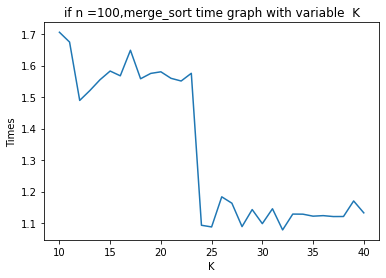

In [139]:
# under size of n =100 graph of time insertion merge sort from  k (10,40)
n = 100
tmp_times = []
random.seed()
B = [random.randint(-1000, 1000) for i in range(n)]
for k in range(10,41):
    B = A[:]
    time1 = 10000*timeit.timeit("i_merge_sort(A, 0, n-1, k)", globals=globals(), number=1)
    tmp_times.append(time1)

plt.plot(list(range(10,41)) , tmp_times)
plt.xlabel("K")
plt.ylabel("Times")
plt.title("if n =100,merge_sort time graph with variable  K")
plt.show()

In [56]:
# comparison  insertion_merge  ,  k was given
n = [100,500,1000,2000,3000,5000,100000,500000]
# optimized k / 루프를 10 번 이상 돌렸을 때,
k = [15,12, 11, 13, 16, 28, 17, 25]
mtime = []
i_mtime = []
for x in range(len(n)):
    A = []
    for i in range(n[x]):
        A.append(random.randint(-1000, 1000))
    B = A[:]
    m_tmptime = timeit.timeit("merge_sort(A,0,n[x]-1)", globals=globals(), number=1)
    im_tmptime = timeit.timeit("i_merge_sort(B,0,n[x]-1,k[x])", globals=globals(), number=1)

    mtime.append(round(m_tmptime, 5))
    i_mtime.append(round(im_tmptime, 5))
# 단위 변환   1ms =. 0.001s
for x in range(len(n)):
    mtime[x] = mtime[x] * 1000
    i_mtime[x] = i_mtime[x] * 1000
print(mtime)
print(i_mtime)

[0.45, 2.81, 6.0200000000000005, 12.65, 18.9, 24.62, 702.85, 3907.66]
[0.23, 1.55, 3.48, 7.53, 9.889999999999999, 15.03, 474.49, 2698.57]


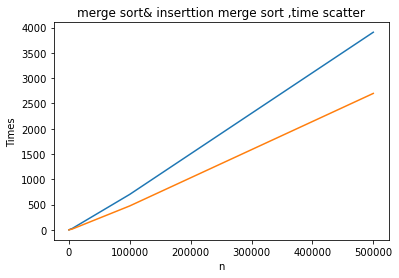

In [57]:
for x in range(len(mtime)):
    mtime[x]=round(mtime[x] ,1)
    i_mtime[x]=round(i_mtime[x] ,1)


plt.plot(n ,mtime)
plt.plot(n ,i_mtime)

plt.xlabel("n")
plt.ylabel("Times")
plt.title("merge sort& inserttion merge sort ,time scatter")
plt.show()

In [78]:
# quick,merge,heap algo rithm camparison

# time
Qt,Mt,Ht = 0,0,0
# compare and swap
Qc,Qs = 0,0
Mc,Ms = 0,0
Hc,Hs = 0,0

Qta=[]
Qca=[]
Qsa=[]

Mta=[]
Mca=[]
Msa=[]

Hta=[]
Hca=[]
Hsa=[]

n =[100, 500, 1000, 5000, 100000, 500000]
for x in n:
    random.seed()
    A = []
    for i in range(x) :
        A.append(random.randint(-1000,1000))
    B = A[:]
    C = A[:]
    Qta.append(timeit.timeit("quick_sort(A,0,x-1)",globals=globals(),number=1))
    Mta.append(timeit.timeit("merge_sort(B,0,x-1)",globals=globals(),number=1))
    Hta.append(timeit.timeit("heap_sort(C)",globals=globals(),number=1))
    Qca.append(Qc)
    Qsa.append(Qs)
    Mca.append(Mc)
    Msa.append(Ms)
    Hca.append(Hc)
    Hsa.append(Hs)
    Qc,Qs = 0,0
    Mc,Ms = 0,0
    Hc,Hs = 0,0

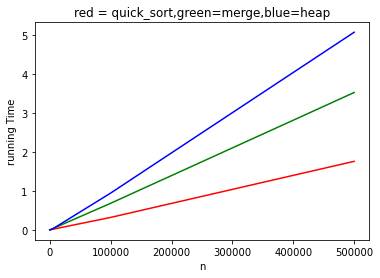

In [83]:
n =[100, 500, 1000, 5000, 100000, 500000]
plt.plot(n ,Qta,"r")
plt.plot(n ,Mta,"g")
plt.plot(n ,Hta,"b")
plt.xlabel("n")
plt.ylabel("running Time")
plt.title("red = quick_sort,green=merge,blue=heap")
plt.show()


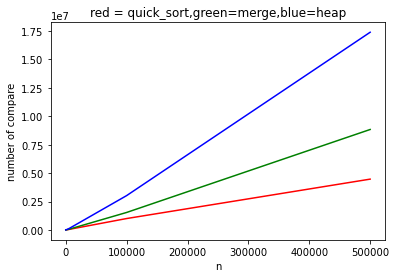

In [81]:
plt.plot(n ,Qca,"r")
plt.plot(n ,Mca,"g")
plt.plot(n ,Hca,"b")
plt.xlabel("n")
plt.ylabel("number of compare")
plt.title("red = quick_sort,green=merge,blue=heap")
plt.show()


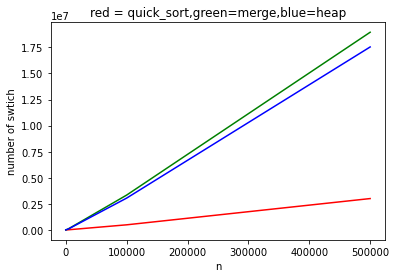

In [80]:
plt.plot(n ,Qsa,"r")
plt.plot(n ,Msa,"g")
plt.plot(n ,Hsa,"b")
plt.xlabel("n")
plt.ylabel("number of swtich")
plt.title("red = quick_sort,green=merge,blue=heap")
plt.show()

